In [79]:
from importlib import reload

import pandas as pd
from bowzer.model import BowzerNet
from bowzer import data
reload(data)
from bowzer.data import Transform
from bowzer.utils import open_image
from bowzer.constants import *
import torch

In [80]:
cast_image_paths = {name: f"/Volumes/KCQDrive/projects/images/{name}.jpg" for name in ['paul_rudd','puggle','jason_segel']}

In [81]:
data_module = Transform(RESIZE_N)
dataloader_train, dataloader_test = data_module.process()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].


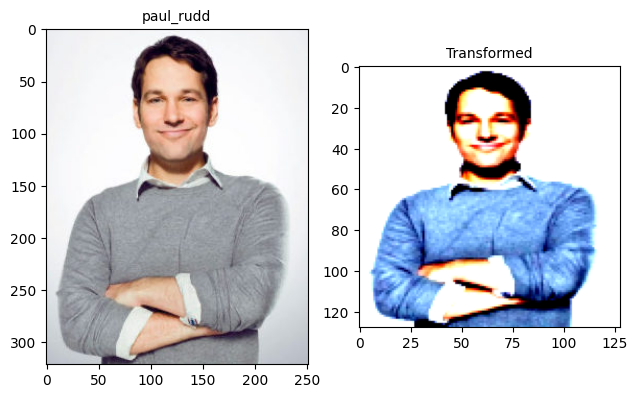

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6041614..2.64].


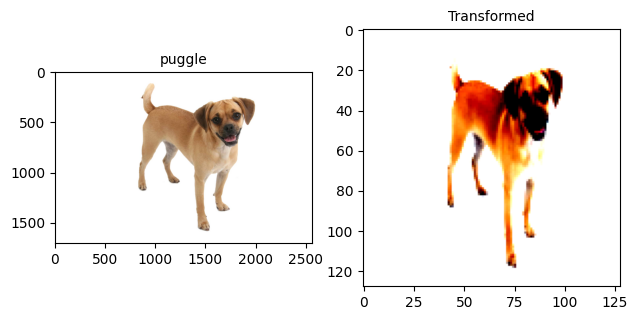

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].


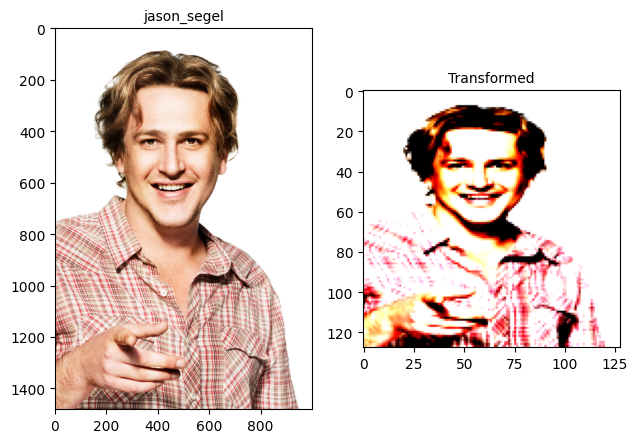

In [20]:
data_module.show_image_transforms(cast_image_paths, train=False)

In [82]:
model = BowzerNet(37)
model.load_state_dict(torch.load('/Volumes/KCQDrive/projects/bowzer/runs/trainer_20241018/model_194829_final'))

<All keys matched successfully>

In [83]:
results = {}
for target in cast_image_paths:
    target_image = open_image(cast_image_paths[target])
    image_tensor = data_module.test_transforms(target_image).unsqueeze(0)
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        pred = model(image_tensor).squeeze(0)
    pred_cls = pred.softmax(0) #tensors to probabilities
    cls_id = pred_cls.argmax().item()
    best_match_image_path = data_module.get_breed_image([name for name, idx in data_module.train_set.class_to_idx.items() if idx == cls_id])
    results[target] = {
        'cls_id': cls_id,
        'cls_label': [name for name, idx in data_module.train_set.class_to_idx.items() if idx == cls_id][0],
        'pred_cls': pred_cls,
        'target_path': cast_image_paths[target],
        'best_match_image_path' : best_match_image_path,
        'all_matches': {k: pred_cls.data[v].item() for k, v in data_module.train_set.class_to_idx.items()}
        }

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].


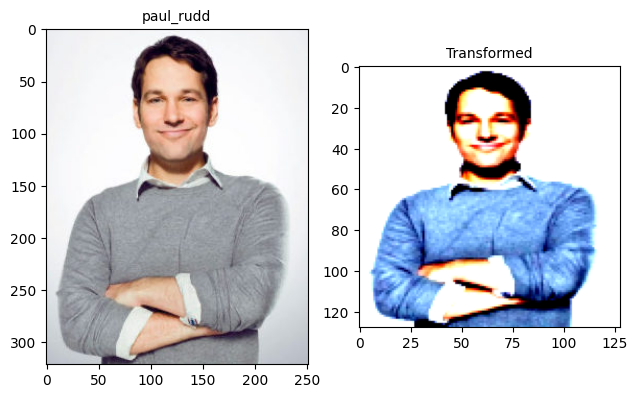

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.3410363].


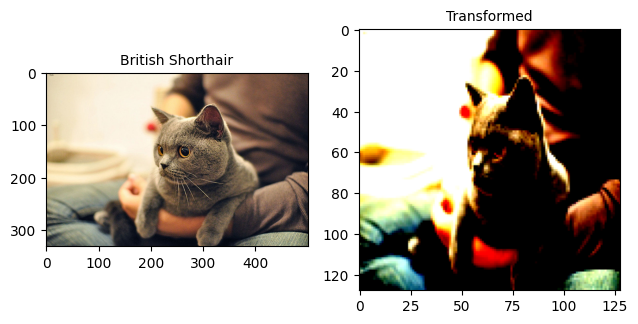

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6041614..2.64].


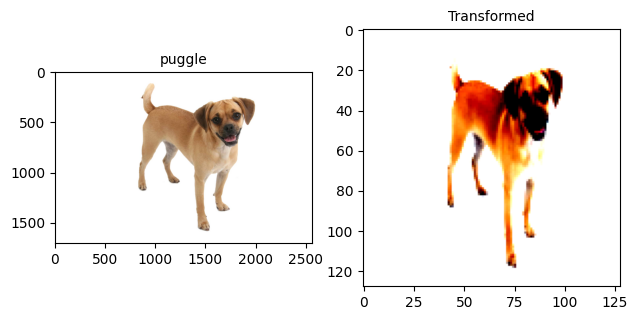

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4308496].


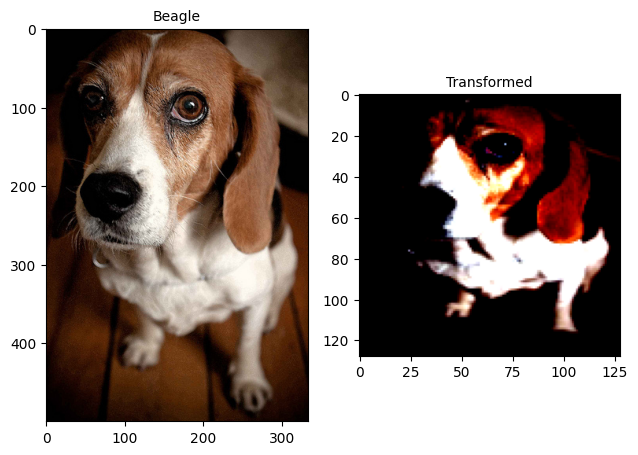

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].


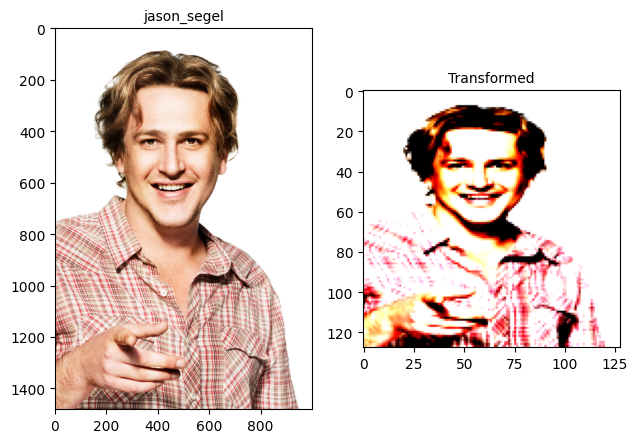

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4308496].


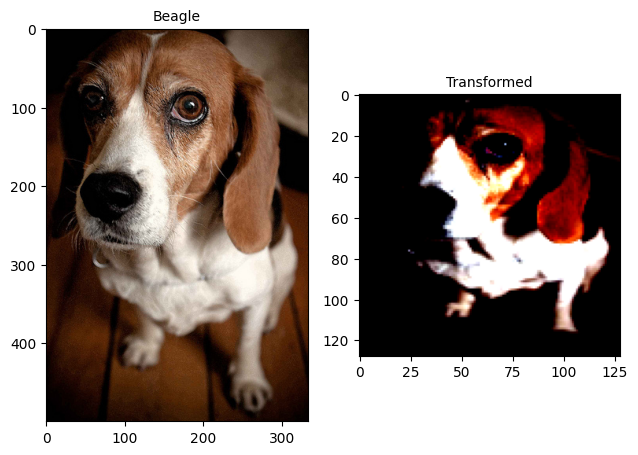

In [84]:
for target in results:
    image_dict = {target:results[target]['target_path']}
    image_dict.update(results[target]['best_match_image_path'])
    data_module.show_image_transforms(image_dict, train=False)

In [63]:
dog_matches = results[target]['all_matches']
pred_df = pd.DataFrame(dog_matches.items(), columns = ['dog','probability']).sort_values(by = 'probability', ascending=False)
pred_df

,dog,probability
12,English Cocker Spaniel,0.389466
4,Beagle,0.240506
3,Basset Hound,0.072373
28,Saint Bernard,0.067459
21,Miniature Pinscher,0.042513
2,American Pit Bull Terrier,0.039712
31,Shiba Inu,0.037933
19,Leonberger,0.028127
14,German Shorthaired,0.026784
8,Boxer,0.014044
